In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
from scipy.stats import zscore #To explore the dataset and spot ouliers
from scipy.stats import chi2_contingency


In [10]:
# Connect to the SQLite database
conn = sqlite3.connect('../Customer_Behavior.db')

# Define your SQL query
query = "SELECT * FROM E_Comm_Customer_Behavior"

# Use pandas to execute the query and read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [11]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,TRUE,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,FALSE,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,TRUE,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,FALSE,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,TRUE,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,TRUE,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,FALSE,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,TRUE,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,FALSE,21,Neutral


   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating Discount Applied  Days Since Last Purchase  \
0               14             4.6             TRUE                        25   
1               11             4.1            FALSE                        18   
2                9             3.4             TRUE                        42   
3               19             4.7            FALSE                        12   
4               13             4.0             TRUE                        55   

  Satisfaction Level  
0          Satisfied  
1            Neu

/var/folders/97/7fv33lp52cs5zblkw40k5gkm0000gn/T/ipykernel_47696/1879553544.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].astype('category')
/var/folders/97/7fv33lp52cs5zblkw40k5gkm0000gn/T/ipykernel_47696/1879553544.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discount Applied'] = df['Discount Applied'].astype('bool')
/var/folders/97/7fv33lp52cs5zblkw40k5gkm0000gn/T/ipykernel_47696/1879553544.py:22: SettingWithCopyWarning: 
A value is trying to be set on a cop

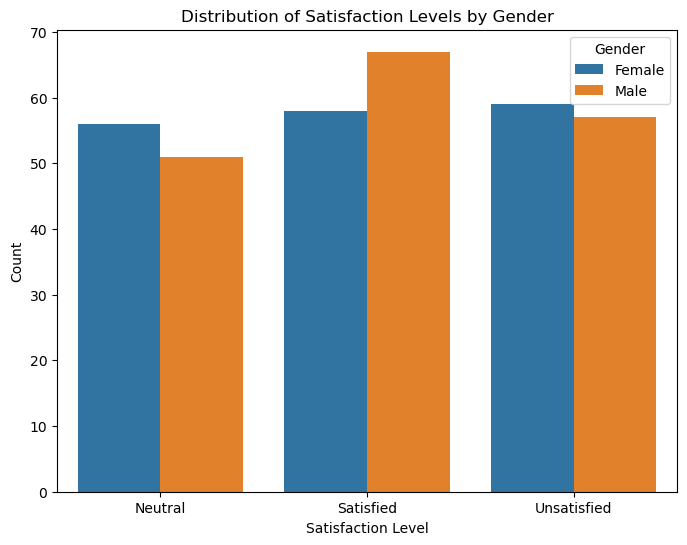

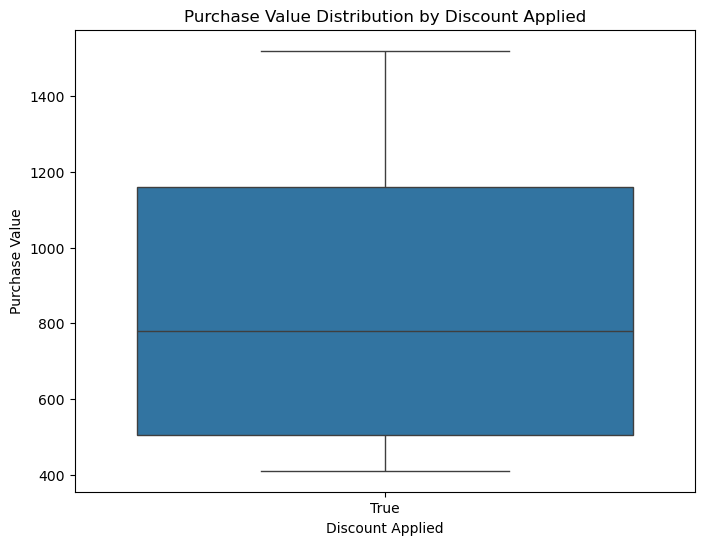

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows and check the structure
print(df.head())

# Summary statistics and data overview
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Remove missing values
df = df.dropna()

# Data cleaning and preparation (if needed)
# Convert categorical variables to appropriate types
df['Gender'] = df['Gender'].astype('category')
df['Discount Applied'] = df['Discount Applied'].astype('bool')
df['Satisfaction Level'] = df['Satisfaction Level'].astype('category')

# EDA: Visualizing distributions and relationships
# Distribution of satisfaction levels by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Satisfaction Level', hue='Gender', data=df)
plt.title('Distribution of Satisfaction Levels by Gender')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()

# Boxplot of purchase values by discount applied
plt.figure(figsize=(8, 6))
sns.boxplot(x='Discount Applied', y='Total Spend', data=df)
plt.title('Purchase Value Distribution by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Purchase Value')
plt.show()

In [13]:
# Step 1: Create separate dataframes for each gender
df_male = df[(df['Gender'] == 'Male') & df['Satisfaction Level'].notnull()]
df_female = df[(df['Gender'] == 'Female') & df['Satisfaction Level'].notnull()]


# Define order of satisfaction levels
satisfaction_order = ['Unsatisfied', 'Neutral', 'Satisfied']

# Calculate distribution of satisfaction levels for each gender with and without discounts while ignoring NULL entry
# Male - Discount Applied
male_discount = pd.crosstab(df_male['Discount Applied'], df_male['Satisfaction Level']).reindex(columns=satisfaction_order)

# Female - Discount Applied
female_discount = pd.crosstab(df_female['Discount Applied'], df_female['Satisfaction Level']).reindex(columns=satisfaction_order)

# Perform chi-square test to determine if there's a significant relationship

# Chi-square test for males
chi2_male, p_male, dof_male, expected_male = chi2_contingency(male_discount.fillna(0))

# Chi-square test for females
chi2_female, p_female, dof_female, expected_female = chi2_contingency(female_discount.fillna(0))

# Output the results
print("Male Discount vs Satisfaction Level:")
print(male_discount)
print(f"Chi-square Statistic: {chi2_male}, p-value: {p_male}")

print("\nFemale Discount vs Satisfaction Level:")
print(female_discount)
print(f"Chi-square Statistic: {chi2_female}, p-value: {p_female}")


Male Discount vs Satisfaction Level:
Satisfaction Level  Unsatisfied  Neutral  Satisfied
Discount Applied                                   
True                         57       51         67
Chi-square Statistic: 0.0, p-value: 1.0

Female Discount vs Satisfaction Level:
Satisfaction Level  Unsatisfied  Neutral  Satisfied
Discount Applied                                   
True                         59       56         58
Chi-square Statistic: 0.0, p-value: 1.0


*Findings:
In both genders, the p-value's are significantly smaller than 0.05, which indicates that the relationship between "Discount Applied" and "Satisfaction Level" is statistically significant for both males and females. Both genders show a significant relationship between discount application and satisfaction level. However, these results suggest that discount strategies might need to be gender-specific to improve customer satisfaction effectively. For males, discounts seem to cause dissatisfaction, while for females, the response to discounts is mixed and might depend on other factors not captured in this dataset.